In [52]:
import os
import sys
import numpy as np
import sklearn as skl
import time
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn.model_selection import train_test_split

sys.path.append("../../../")
import CalibratedTimeseriesModels

from CalibratedTimeseriesModels.utils import *
from CalibratedTimeseriesModels.models.gnn import *
from CalibratedTimeseriesModels.models.gmnn import *
from CalibratedTimeseriesModels.evaluators import ExplicitEvaluator

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# load data
X_orig = torch.load("../../../datasets/processed/openEI/X_openei_011_subset_multitask.pt")
Y_orig = torch.load("../../../datasets/processed/openEI/Y_openei_011_subset_multitask.pt")

past_dims = 24
fut_dims = 12

X = X_orig[0,:,:past_dims].unsqueeze(-1).float()
Y = Y_orig[0,:,:fut_dims].unsqueeze(-1).float()

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=1)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, train_size = 0.7/0.9,random_state=1)
X_batches, Y_batches = batch(X_train, Y_train, batch_size = 128)

### Diagonal Covariance Matrix

In [4]:
hidden_layers = [40, 40, 40]
model1 = GaussianNeuralNet(1, past_dims, hidden_layers, 1, fut_dims)

In [5]:
train(model1, X_batches, Y_batches, num_epochs=100)

epoch : 1, loss: 4.9182
epoch : 11, loss: -14.3967
epoch : 21, loss: -16.0249
epoch : 31, loss: -15.1391
epoch : 41, loss: -17.6494
epoch : 51, loss: -17.6106
epoch : 61, loss: -17.0504
epoch : 71, loss: -18.4572
epoch : 81, loss: -18.4432
epoch : 91, loss: -18.9533
Learning finished!


In [6]:
model1.eval()
dtest1 = model1(X_test)
mape(dtest1, Y_test)

(tensor(0.0368, grad_fn=<MeanBackward0>),
 tensor([0.0221, 0.0280, 0.0302, 0.0302, 0.0349, 0.0362, 0.0418, 0.0364, 0.0415,
         0.0433, 0.0514, 0.0461], grad_fn=<MeanBackward1>),
 tensor([0.0182, 0.0253, 0.0289, 0.0303, 0.0338, 0.0316, 0.0340, 0.0326, 0.0371,
         0.0395, 0.0435, 0.0431], grad_fn=<StdBackward1>))

In [7]:
wape(dtest1, Y_test)

(tensor(0.0516),
 tensor([0.0319, 0.0388, 0.0429, 0.0458, 0.0499, 0.0514, 0.0567, 0.0552, 0.0606,
         0.0597, 0.0650, 0.0616]),
 tensor([0.0133, 0.0199, 0.0235, 0.0252, 0.0281, 0.0252, 0.0268, 0.0253, 0.0294,
         0.0321, 0.0369, 0.0361]))

In [8]:
rmse(dtest1, Y_test)

(tensor(0.0520, grad_fn=<PowBackward0>),
 tensor([0.0011, 0.0018, 0.0018, 0.0020, 0.0024, 0.0026, 0.0033, 0.0024, 0.0031,
         0.0037, 0.0045, 0.0037], grad_fn=<MeanBackward1>),
 tensor([0.0021, 0.0044, 0.0045, 0.0064, 0.0067, 0.0060, 0.0071, 0.0043, 0.0053,
         0.0068, 0.0081, 0.0064], grad_fn=<StdBackward1>))

In [9]:
rwse(dtest1, Y_test)

(tensor(0.0709),
 tensor([0.0021, 0.0032, 0.0034, 0.0040, 0.0044, 0.0048, 0.0057, 0.0054, 0.0065,
         0.0067, 0.0075, 0.0066]),
 tensor([0.0024, 0.0048, 0.0048, 0.0066, 0.0069, 0.0062, 0.0074, 0.0048, 0.0060,
         0.0073, 0.0087, 0.0070]))

In [10]:
nll(dtest1, Y_test)

(tensor(-19.4282, grad_fn=<MeanBackward0>),
 tensor([-12.2502, -22.4026,  64.0331, -15.2729, -19.3313, -24.4656, -26.6377,
         -21.1396, -27.9572, -26.2390, -17.9200,  -7.7062, -27.7699, -20.8359,
         -22.2508, -12.9494, -25.0182, -17.4381, -22.4410, -26.2592, -22.0866,
         -23.2109, -24.6339, -27.1082, -17.2009, -15.0283, -26.9430, -17.9390,
         -23.9413, -25.7846, -20.4408, -23.1171, -14.1180, -18.5568, -27.3449,
         -22.6117, -10.8077,  45.9141, -20.6482, -26.3125,  -8.9777, -25.1037,
         -23.4999, -15.7600, -21.2785, -21.9003, -17.0326, -18.4007, -23.4764,
         -25.5590, -16.9560, -10.7284, -25.2600, -23.0779, -22.8087, -27.1443,
         -18.3656, -20.6066, -10.2548, -21.0638, -12.7322, -27.0839, -20.0680,
         -25.5886, -23.6488, -23.9208, -22.1706, -13.8420, -19.9139, -25.6382,
         -17.8425,  -3.8471, -28.3308, -24.2870, -17.8362,  -6.6589, -21.1606,
         -21.6910,  25.5156, -26.3788, -15.8707, -21.5516, -28.0778, -25.4016,
        

In [81]:
torch.argmin(nll(dtest1, Y_test)[1])

tensor(782, grad_fn=<NotImplemented>)

### Full Covariance Matrix

In [30]:
hidden_layers = [40, 40, 40]
model2 = GaussianNeuralNet(1, past_dims, hidden_layers, 1, fut_dims, covariance_type='full')

In [31]:
train(model2, X_batches, Y_batches, num_epochs=100)

epoch : 1, loss: 7.7767
epoch : 11, loss: -9.1237
epoch : 21, loss: -10.8775
epoch : 31, loss: -13.0773
epoch : 41, loss: -10.7687
epoch : 51, loss: -18.0318
epoch : 61, loss: -8.5966
epoch : 71, loss: -13.5809
epoch : 81, loss: -15.8613
epoch : 91, loss: -16.2095
Learning finished!


In [32]:
model2.eval()
dtest2 = model2(X_test)
mape(dtest2, Y_test)

(tensor(0.2593, grad_fn=<MeanBackward0>),
 tensor([0.2844, 0.2848, 0.2819, 0.2837, 0.2782, 0.2595, 0.2469, 0.2488, 0.2505,
         0.2321, 0.2324, 0.2277], grad_fn=<MeanBackward1>),
 tensor([0.1870, 0.1915, 0.1921, 0.1926, 0.1951, 0.1905, 0.1772, 0.1751, 0.1802,
         0.1803, 0.1732, 0.1645], grad_fn=<StdBackward1>))

In [33]:
wape(dtest2, Y_test)

(tensor(0.5128),
 tensor([0.5508, 0.5544, 0.5542, 0.5423, 0.5361, 0.5162, 0.5036, 0.5051, 0.5051,
         0.4743, 0.4579, 0.4535]),
 tensor([0.1394, 0.1373, 0.1267, 0.1271, 0.1388, 0.1335, 0.1262, 0.1345, 0.1429,
         0.1290, 0.1169, 0.1122]))

In [34]:
rmse(dtest2, Y_test)

(tensor(0.4334, grad_fn=<PowBackward0>),
 tensor([0.2535, 0.2640, 0.2639, 0.2600, 0.2358, 0.1894, 0.1514, 0.1502, 0.1469,
         0.1226, 0.1154, 0.1016], grad_fn=<MeanBackward1>),
 tensor([0.4912, 0.5232, 0.4986, 0.4828, 0.4414, 0.3433, 0.2559, 0.2499, 0.2373,
         0.1865, 0.1694, 0.1435], grad_fn=<StdBackward1>))

In [35]:
nll(dtest2, Y_test)

(tensor(-17.3849, grad_fn=<MeanBackward0>),
 tensor([-13.4437, -19.2044, -15.3165, -17.6987, -11.9396, -18.0888, -18.4100,
         -13.5678, -19.1672, -19.6323, -18.3863, -18.4845, -19.5017, -18.7732,
         -19.8932, -10.8975, -20.0613, -12.3422, -15.4625, -19.8536, -20.8766,
         -16.6987, -17.4665, -20.6599, -18.7222, -17.1175, -19.2322, -14.5195,
         -19.9953, -16.0948, -19.5895, -18.3280, -12.8679, -13.7641, -16.9045,
         -17.6711, -16.3436, -15.3988, -16.9829, -20.7722, -15.3793, -14.9884,
         -20.2478, -19.2780, -17.5469, -20.3448, -17.6315, -10.6820, -20.5054,
         -19.5831, -12.6607, -16.0493, -17.7450, -16.2450, -19.4354, -19.1263,
         -10.7986, -13.2880, -15.7153, -19.2443, -16.6765, -21.6114, -16.6096,
         -16.3945, -18.5811, -17.7954, -21.0019, -16.7565, -16.4705, -21.9728,
         -15.9763, -16.5006, -19.6779, -18.9563, -17.3281, -18.1191, -14.8868,
         -19.8475, -10.6439, -22.6064, -16.7546, -16.7822, -19.4547, -19.7891,
        

## Low Rank Covariance

In [36]:
hidden_layers = [40, 40, 40]
model3 = GaussianNeuralNet(1, past_dims, hidden_layers, 1, fut_dims, covariance_type='low-rank',rank=2)

In [37]:
train(model3, X_batches, Y_batches, num_epochs=100)

epoch : 1, loss: 4.4356
epoch : 11, loss: -14.7918
epoch : 21, loss: -18.3509
epoch : 31, loss: -19.6632
epoch : 41, loss: -20.6606
epoch : 51, loss: -21.8109
epoch : 61, loss: -21.8064
epoch : 71, loss: -22.6790
epoch : 81, loss: -22.9069
epoch : 91, loss: -22.8729
Learning finished!


In [38]:
model3.eval()
dtest3 = model3(X_test)
mape(dtest3, Y_test)

(tensor(0.0679, grad_fn=<MeanBackward0>),
 tensor([0.0518, 0.0588, 0.0619, 0.0605, 0.0656, 0.0658, 0.0680, 0.0721, 0.0742,
         0.0752, 0.0808, 0.0800], grad_fn=<MeanBackward1>),
 tensor([0.0432, 0.0461, 0.0498, 0.0500, 0.0557, 0.0585, 0.0565, 0.0535, 0.0574,
         0.0609, 0.0720, 0.0791], grad_fn=<StdBackward1>))

In [39]:
wape(dtest3, Y_test)

(tensor(0.1375),
 tensor([0.0884, 0.1060, 0.1274, 0.1292, 0.1461, 0.1456, 0.1488, 0.1570, 0.1561,
         0.1504, 0.1514, 0.1436]),
 tensor([0.0373, 0.0353, 0.0412, 0.0391, 0.0392, 0.0434, 0.0453, 0.0447, 0.0549,
         0.0689, 0.0770, 0.0839]))

In [40]:
rmse(dtest3, Y_test)

(tensor(0.1044, grad_fn=<PowBackward0>),
 tensor([0.0050, 0.0066, 0.0088, 0.0093, 0.0136, 0.0152, 0.0136, 0.0132, 0.0125,
         0.0106, 0.0122, 0.0101], grad_fn=<MeanBackward1>),
 tensor([0.0094, 0.0124, 0.0218, 0.0227, 0.0369, 0.0442, 0.0294, 0.0238, 0.0240,
         0.0191, 0.0225, 0.0180], grad_fn=<StdBackward1>))

In [41]:
rwse(dtest3, Y_test)

(tensor(0.1956),
 tensor([0.0140, 0.0207, 0.0313, 0.0328, 0.0474, 0.0482, 0.0476, 0.0519, 0.0503,
         0.0415, 0.0401, 0.0331]),
 tensor([0.0124, 0.0180, 0.0356, 0.0362, 0.0599, 0.0656, 0.0495, 0.0476, 0.0491,
         0.0414, 0.0394, 0.0323]))

In [42]:
nll(dtest3, Y_test)

(tensor(-23.5008, grad_fn=<MeanBackward0>),
 tensor([-21.7583, -25.7977, -14.3271, -22.3228, -14.2929, -29.4610, -22.0709,
         -15.8332, -26.5525, -29.4880, -29.4999, -22.0454, -30.2107, -25.6469,
         -19.7959, -23.4658, -20.5232, -21.9198, -22.7750, -30.3107, -26.1884,
         -28.6305, -23.8999, -17.5066, -17.4489, -23.1317, -28.7445, -12.2897,
         -26.9853, -24.2805, -22.7128, -26.1268, -21.2967, -24.9826, -27.6129,
         -29.9842, -19.2835, -27.7621, -24.1022, -25.3737, -10.7541, -26.9151,
         -22.3231, -19.6936, -21.4737, -23.5779, -24.4025, -19.4636, -22.2654,
         -29.9555, -19.5082, -19.3365, -25.1806, -26.4404, -30.1390, -29.4362,
         -12.4854, -23.0832, -18.9519, -26.7751, -26.8054, -27.9845, -16.0802,
         -25.0015, -26.6948, -29.4926, -26.6578,  -7.5371, -25.1409, -26.1502,
         -17.3493, -23.8156, -27.9520, -22.4171, -24.3720, -22.8512, -23.1558,
         -29.6745,  11.0690, -29.8370, -23.7049, -25.1243, -28.7754, -26.0681,
        

### Isotropic Mixture Model

In [71]:
hidden_layers = [40, 40, 40]
model4 = GaussianMixtureNeuralNet(1, past_dims, hidden_layers, 1, fut_dims, n_components=2)

In [72]:
train(model4, X_batches, Y_batches, num_epochs=200, learning_rate=0.005)

epoch : 1, loss: 6.3428
epoch : 11, loss: -15.3119
epoch : 21, loss: -17.6968
epoch : 31, loss: -18.4721
epoch : 41, loss: -16.2363
epoch : 51, loss: -19.7968
epoch : 61, loss: -19.7069
epoch : 71, loss: -19.4188
epoch : 81, loss: -20.4703
epoch : 91, loss: -20.3129
epoch : 101, loss: -19.9191
epoch : 111, loss: -20.6568
epoch : 121, loss: -20.6782
epoch : 131, loss: -19.5104
epoch : 141, loss: -21.3154
epoch : 151, loss: -21.6041
epoch : 161, loss: -21.7069
epoch : 171, loss: -21.7114
epoch : 181, loss: -21.9945
epoch : 191, loss: -21.3770
Learning finished!


In [73]:
model4.eval()
dtest4 = model4(X_test)
mape(dtest4, Y_test)

(tensor(0.0344, grad_fn=<MeanBackward0>),
 tensor([0.0193, 0.0226, 0.0296, 0.0316, 0.0363, 0.0380, 0.0371, 0.0417, 0.0427,
         0.0389, 0.0375, 0.0376], grad_fn=<MeanBackward1>),
 tensor([0.0165, 0.0215, 0.0275, 0.0317, 0.0351, 0.0360, 0.0338, 0.0344, 0.0373,
         0.0365, 0.0376, 0.0364], grad_fn=<StdBackward1>))

In [74]:
wape(dtest4, Y_test)

(tensor(0.0491),
 tensor([0.0282, 0.0350, 0.0433, 0.0450, 0.0499, 0.0527, 0.0549, 0.0561, 0.0578,
         0.0548, 0.0557, 0.0565]),
 tensor([0.0119, 0.0165, 0.0220, 0.0265, 0.0297, 0.0305, 0.0278, 0.0288, 0.0310,
         0.0305, 0.0311, 0.0297]))

In [75]:
rmse(dtest4, Y_test)

(tensor(0.0475, grad_fn=<PowBackward0>),
 tensor([0.0009, 0.0012, 0.0019, 0.0020, 0.0024, 0.0023, 0.0023, 0.0028, 0.0031,
         0.0028, 0.0027, 0.0026], grad_fn=<MeanBackward1>),
 tensor([0.0022, 0.0036, 0.0057, 0.0067, 0.0072, 0.0050, 0.0051, 0.0045, 0.0051,
         0.0056, 0.0061, 0.0053], grad_fn=<StdBackward1>))

In [76]:
rwse(dtest4, Y_test)

(tensor(0.0680),
 tensor([0.0018, 0.0026, 0.0038, 0.0039, 0.0045, 0.0047, 0.0052, 0.0057, 0.0061,
         0.0056, 0.0058, 0.0058]),
 tensor([0.0025, 0.0040, 0.0061, 0.0069, 0.0075, 0.0054, 0.0055, 0.0052, 0.0058,
         0.0060, 0.0065, 0.0059]))

In [77]:
nll(dtest4, Y_test)

(tensor(-22.8941, grad_fn=<MeanBackward0>),
 tensor([-2.4366e+01, -2.5582e+01,  5.6000e+01, -2.0678e+01, -1.7783e+01,
         -2.7432e+01, -2.7751e+01, -2.3026e+01, -3.3457e+01, -2.8975e+01,
         -2.3737e+01, -1.0097e+01, -2.9496e+01, -2.0792e+01, -2.9347e+01,
         -2.4420e+01, -2.3063e+01, -2.3491e+01, -2.3661e+01, -3.3316e+01,
         -2.3086e+01, -2.6795e+01, -2.0888e+01, -2.4567e+01, -2.3883e+01,
         -2.4336e+01, -2.7198e+01, -2.3069e+01, -2.9287e+01, -3.1472e+01,
         -2.6216e+01, -2.3881e+01, -2.6170e+01, -2.3392e+01, -3.3027e+01,
         -2.6282e+01, -7.7195e+00,  1.7328e+01, -2.0470e+01, -3.1080e+01,
         -8.7039e+00, -2.7516e+01, -2.9985e+01, -2.0280e+01, -2.4394e+01,
         -2.5998e+01, -2.2400e+01, -2.0319e+01, -2.2539e+01, -3.2798e+01,
         -2.3933e+01, -2.2878e+01, -2.2330e+01, -2.0026e+01, -2.5516e+01,
         -3.3747e+01, -2.2874e+01, -2.4812e+01, -1.8386e+01, -2.0810e+01,
         -1.8165e+01, -2.5561e+01, -2.1023e+01, -3.1493e+01, -2.5457

### Full Mixture Model

In [55]:
hidden_layers = [40, 40, 40]
model5 = GaussianMixtureNeuralNet(1, past_dims, hidden_layers, 1, fut_dims, n_components=2, covariance_type='full')

In [58]:
train(model5, X_batches, Y_batches, num_epochs=100, learning_rate = 0.005)

epoch : 1, loss: -5.1654
epoch : 11, loss: -15.2996
epoch : 21, loss: -15.9702
epoch : 31, loss: -15.9872
epoch : 41, loss: -16.8502
epoch : 51, loss: -17.0445
epoch : 61, loss: -17.7342
epoch : 71, loss: -17.9734
epoch : 81, loss: -18.3904
epoch : 91, loss: -18.5669
Learning finished!


In [59]:
model5.eval()
dtest5 = model4(X_test)
mape(dtest5, Y_test)

(tensor(0.0360, grad_fn=<MeanBackward0>),
 tensor([0.0250, 0.0293, 0.0313, 0.0342, 0.0373, 0.0381, 0.0386, 0.0399, 0.0385,
         0.0393, 0.0418, 0.0391], grad_fn=<MeanBackward1>),
 tensor([0.0204, 0.0253, 0.0285, 0.0340, 0.0352, 0.0352, 0.0340, 0.0341, 0.0354,
         0.0373, 0.0383, 0.0372], grad_fn=<StdBackward1>))

In [60]:
wape(dtest5, Y_test)

(tensor(0.0512),
 tensor([0.0368, 0.0431, 0.0439, 0.0516, 0.0491, 0.0522, 0.0538, 0.0567, 0.0547,
         0.0584, 0.0582, 0.0560]),
 tensor([0.0145, 0.0185, 0.0226, 0.0273, 0.0296, 0.0291, 0.0273, 0.0273, 0.0287,
         0.0301, 0.0321, 0.0309]))

In [61]:
rmse(dtest5, Y_test)

(tensor(0.0496, grad_fn=<PowBackward0>),
 tensor([0.0015, 0.0019, 0.0019, 0.0022, 0.0024, 0.0025, 0.0028, 0.0027, 0.0027,
         0.0030, 0.0031, 0.0029], grad_fn=<MeanBackward1>),
 tensor([0.0034, 0.0045, 0.0048, 0.0065, 0.0067, 0.0061, 0.0065, 0.0047, 0.0045,
         0.0058, 0.0062, 0.0058], grad_fn=<StdBackward1>))

In [62]:
rwse(dtest5, Y_test)

(tensor(0.0697),
 tensor([0.0030, 0.0040, 0.0037, 0.0047, 0.0043, 0.0047, 0.0051, 0.0056, 0.0053,
         0.0062, 0.0060, 0.0056]),
 tensor([0.0040, 0.0055, 0.0051, 0.0068, 0.0070, 0.0064, 0.0068, 0.0053, 0.0050,
         0.0063, 0.0066, 0.0064]))

In [63]:
nll(dtest5, Y_test)

(tensor(-21.5919, grad_fn=<MeanBackward0>),
 tensor([-1.9326e+01, -2.2646e+01,  1.5017e+02, -2.4789e+01, -2.0058e+01,
         -2.7618e+01, -2.1344e+01, -2.0119e+01, -2.7874e+01, -2.8501e+01,
         -2.5062e+01, -1.9465e+01, -2.6845e+01, -2.3956e+01, -2.7120e+01,
         -2.2495e+01, -2.4031e+01, -1.6141e+01, -2.0308e+01, -2.6009e+01,
         -2.5790e+01, -2.5441e+01, -1.8319e+01, -2.5549e+01, -1.2380e+01,
         -2.2515e+01, -2.8520e+01, -1.8322e+01, -2.8126e+01, -2.7006e+01,
         -2.4243e+01, -1.7580e+01, -2.0242e+01, -2.3397e+01, -2.9236e+01,
         -2.3679e+01, -1.8668e+01,  9.5082e+00, -1.9829e+01, -2.8199e+01,
         -2.6427e+00, -2.6893e+01, -2.7335e+01, -2.1003e+01, -2.2395e+01,
         -2.8594e+01, -2.3459e+01, -1.9266e+01, -2.2896e+01, -2.6612e+01,
         -2.2358e+01, -2.3933e+01, -2.2171e+01, -1.8447e+01, -2.1815e+01,
         -3.0055e+01, -1.7260e+01, -2.1900e+01, -1.8007e+01, -2.3595e+01,
         -1.9457e+01, -2.6219e+01, -1.8225e+01, -2.8528e+01, -2.6391

### Low Rank Mixture Model

In [64]:
hidden_layers = [40, 40, 40]
model6 = GaussianMixtureNeuralNet(1, past_dims, hidden_layers, 1, fut_dims, n_components=2, covariance_type='low-rank',rank=2)

In [65]:
train(model6, X_batches, Y_batches, num_epochs=200, learning_rate=.005)

epoch : 1, loss: 6.9442
epoch : 11, loss: -13.9986
epoch : 21, loss: -19.4112
epoch : 31, loss: -21.4802
epoch : 41, loss: -22.4463
epoch : 51, loss: -23.4924
epoch : 61, loss: -24.2252
epoch : 71, loss: -24.6446
epoch : 81, loss: -24.9749
epoch : 91, loss: -25.4652
epoch : 101, loss: -25.9939
epoch : 111, loss: -26.2941
epoch : 121, loss: -26.3341
epoch : 131, loss: -26.6542
epoch : 141, loss: -26.7531
epoch : 151, loss: -27.0922
epoch : 161, loss: -26.9195
epoch : 171, loss: -26.8892
epoch : 181, loss: -27.8458
epoch : 191, loss: -27.6203
Learning finished!


In [66]:
model6.eval()
dtest6 = model6(X_test)
mape(dtest6, Y_test)

(tensor(0.0447, grad_fn=<MeanBackward0>),
 tensor([0.0310, 0.0411, 0.0434, 0.0441, 0.0453, 0.0434, 0.0465, 0.0440, 0.0463,
         0.0520, 0.0484, 0.0510], grad_fn=<MeanBackward1>),
 tensor([0.0233, 0.0326, 0.0382, 0.0409, 0.0408, 0.0371, 0.0378, 0.0367, 0.0390,
         0.0450, 0.0445, 0.0484], grad_fn=<StdBackward1>))

In [67]:
wape(dtest6, Y_test)

(tensor(0.1043),
 tensor([0.0631, 0.0853, 0.0929, 0.1004, 0.1029, 0.0998, 0.1077, 0.1140, 0.1237,
         0.1321, 0.1123, 0.1172]),
 tensor([0.0214, 0.0285, 0.0363, 0.0403, 0.0394, 0.0359, 0.0372, 0.0364, 0.0435,
         0.0486, 0.0485, 0.0501]))

In [68]:
rmse(dtest6, Y_test)

(tensor(0.0623, grad_fn=<PowBackward0>),
 tensor([0.0020, 0.0036, 0.0034, 0.0038, 0.0041, 0.0037, 0.0043, 0.0042, 0.0040,
         0.0050, 0.0044, 0.0041], grad_fn=<MeanBackward1>),
 tensor([0.0035, 0.0065, 0.0071, 0.0101, 0.0101, 0.0075, 0.0077, 0.0080, 0.0062,
         0.0080, 0.0080, 0.0074], grad_fn=<StdBackward1>))

In [69]:
rwse(dtest6, Y_test)

(tensor(0.1489),
 tensor([0.0098, 0.0180, 0.0178, 0.0217, 0.0224, 0.0205, 0.0234, 0.0250, 0.0281,
         0.0319, 0.0234, 0.0240]),
 tensor([0.0100, 0.0181, 0.0141, 0.0186, 0.0188, 0.0134, 0.0159, 0.0156, 0.0146,
         0.0160, 0.0148, 0.0151]))

In [70]:
nll(dtest6, Y_test)

(tensor(-27.8664, grad_fn=<MeanBackward0>),
 tensor([-24.1122, -28.2017, -17.5883, -21.6176, -19.9416, -32.3223, -30.7477,
         -24.1712, -32.2387, -32.4915, -32.6549, -29.9254, -31.7257, -27.1985,
         -26.3592, -29.7925, -24.8856, -23.6409, -26.9891, -36.5492, -33.7588,
         -33.1729, -30.5637, -30.3961, -24.7965, -25.1160, -33.6123, -23.7132,
         -34.3194, -29.5422, -27.8542, -17.2363, -26.7619, -30.6966, -36.3565,
         -32.1482, -26.0962,   3.9786, -29.9423, -32.7340,  -8.9864, -32.6060,
         -32.0145, -23.0410, -25.8661, -32.4505, -21.6666, -21.1960, -27.0460,
         -31.7337, -24.7630, -12.9832, -31.8151, -26.1821, -29.4587, -36.1144,
         -22.9318, -30.6871, -27.1019, -30.3779, -29.3855, -31.6301, -23.3395,
         -31.0079, -32.0784, -34.4738, -27.3237, -13.0584, -20.2898, -35.2382,
         -25.6785, -18.5105, -28.0907, -32.9190, -29.0127, -24.6401, -23.9733,
         -31.7739,  -0.3792, -30.0600, -29.8249, -26.8920, -34.7905, -35.4930,
        

### Single Gaussian sample comparisons

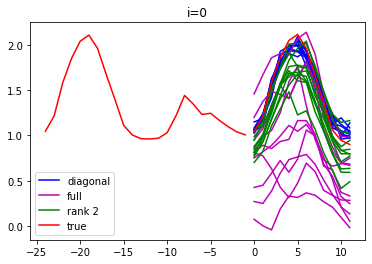

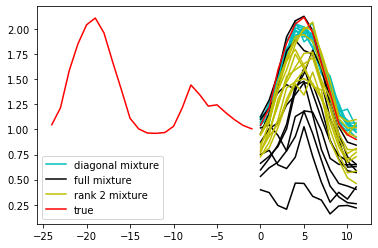

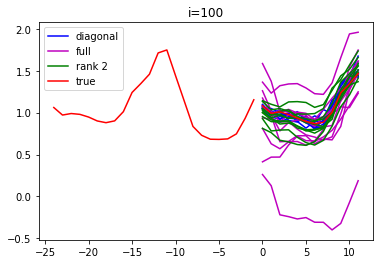

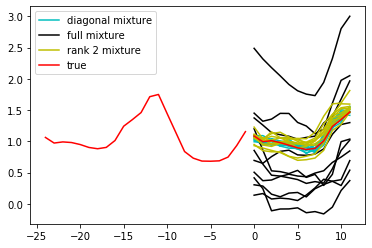

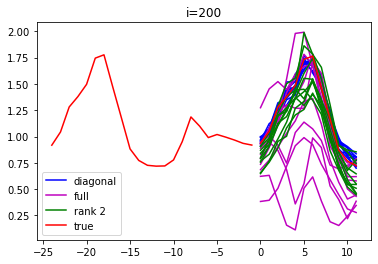

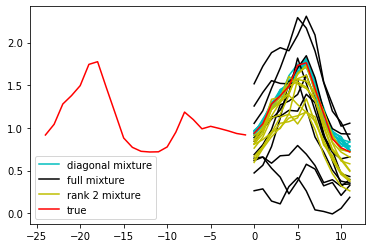

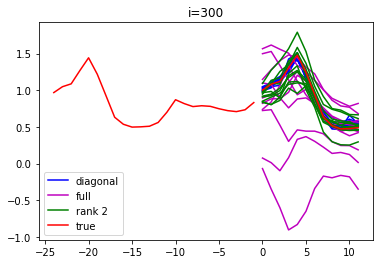

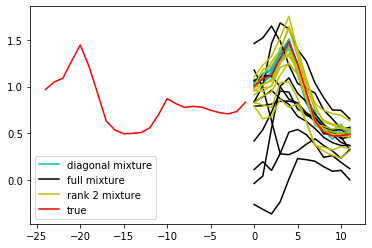

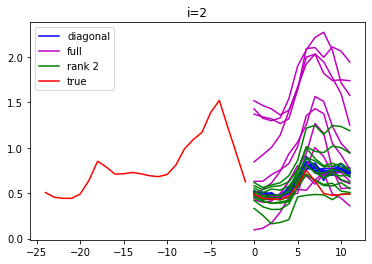

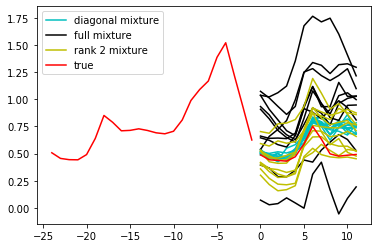

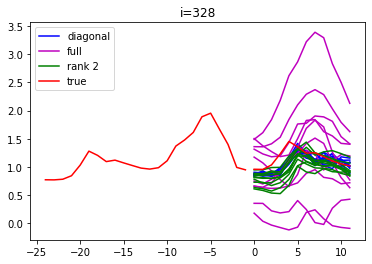

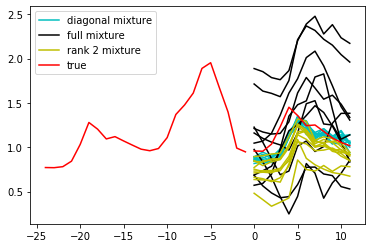

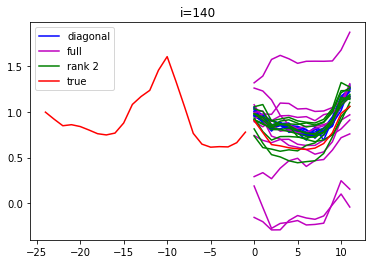

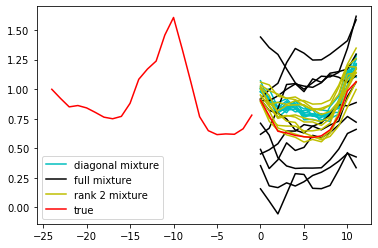

In [93]:
samples1 = dtest1.sample((10,))
samples2 = dtest2.sample((10,))
samples3 = dtest3.sample((10,))
samples4 = dtest1.sample((10,))
samples5 = dtest2.sample((10,))
samples6 = dtest3.sample((10,))
_, indices = torch.sort(nll(dtest1, Y_test)[1])
for i in [0,100,200,300, *indices[-3:].tolist()]:
    a1 = plt.plot(range(fut_dims), samples1[:,i,:].T,'b',label='diagonal')
    a2 = plt.plot(range(fut_dims), samples2[:,i,:].T,'m',label='full')
    a3 = plt.plot(range(fut_dims), samples3[:,i,:].T,'g',label='rank 2')
    tp = plt.plot(np.arange(-1,-25,-1),X_test[i,:,:],'r')
    t = plt.plot(range(fut_dims), Y_test[i,:,0], 'r', label = 'true')
    plt.title("i=%d"%(i))
    plt.legend(handles =[a1[0],a2[0],a3[0],t[0]])
    plt.show()
    
    
    a4 = plt.plot(range(fut_dims), samples4[:,i,:].T,'c',label='diagonal mixture')
    a5 = plt.plot(range(fut_dims), samples5[:,i,:].T,'k',label='full mixture')
    a6 = plt.plot(range(fut_dims), samples6[:,i,:].T,'y',label='rank 2 mixture')
    tp = plt.plot(np.arange(-1,-25,-1),X_test[i,:,:],'r')
    t = plt.plot(range(fut_dims), Y_test[i,:,0], 'r', label = 'true')
    
    plt.legend(handles =[a4[0],a5[0],a6[0],t[0]])
    plt.show()